<a href="https://colab.research.google.com/github/MD03/RLT/blob/main/RLT_Armed_Bandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

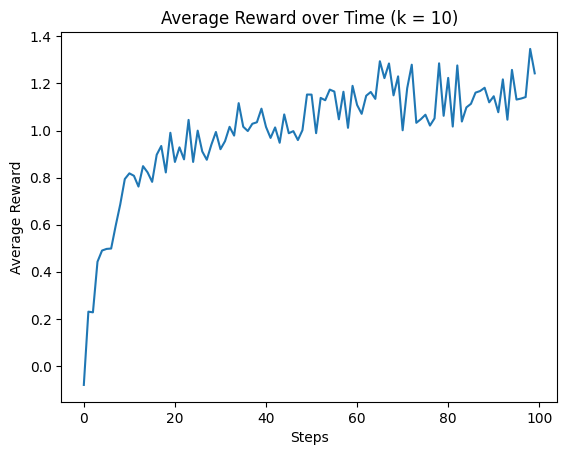

In [2]:
#Armed Bandit
import numpy as np
import matplotlib.pyplot as plt

class KArmedBandit:
    def __init__(self, k, true_reward_mean=0, true_reward_std=1):
        self.k = k
        self.true_reward_mean = true_reward_mean
        self.true_reward_std = true_reward_std
        self.q_true = np.random.normal(loc=true_reward_mean, scale=true_reward_std, size=k)
        self.q_estimate = np.zeros(k)
        self.action_count = np.zeros(k)
        self.epsilon = 0.1

    def select_action(self):
        if np.random.random() < self.epsilon:
            # Exploration: Randomly select an action
            return np.random.choice(self.k)
        else:
            # Exploitation: Select action with highest estimated value
            return np.argmax(self.q_estimate)

    def take_action(self, action):
        # Get reward for the selected action
        reward = np.random.normal(loc=self.q_true[action], scale=1)
        self.action_count[action] += 1
        # Update q_estimate for the selected action
        self.q_estimate[action] += (reward - self.q_estimate[action]) / self.action_count[action]
        return reward

def run_bandit_problem(k, num_steps, num_runs):
    rewards = np.zeros((num_runs, num_steps))
    for i in range(num_runs):
        bandit = KArmedBandit(k)
        for step in range(num_steps):
            action = bandit.select_action()
            reward = bandit.take_action(action)
            rewards[i, step] = reward
    average_rewards = np.mean(rewards, axis=0)
    return average_rewards

if __name__ == "__main__":
    k = 10  # Number of arms
    num_steps = 100  # Number of steps
    num_runs = 200  # Number of runs

    average_rewards = run_bandit_problem(k, num_steps, num_runs)

    # Plot the results
    plt.plot(average_rewards)
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time (k = {})'.format(k))
    plt.show()